In [3]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from math import nan

from CASutils import averaging_utils as avg
from CASutils import qbo_utils as qbo
from CASutils import plotposition_utils as plotpos
from CASutils import readdata_utils as read
from CASutils import colorbar_utils as cbars

In [4]:
plotpath="/project/cas/islas/python_plots/CAM7_vertres_paper/FIGURES/SUPP/"

In [5]:
basepath="/project/cas/islas/python_savs/CAM7_vertres_paper/DATA_SORT/QBOcomposites/monthly/"
dz500_bugfixed = xr.open_dataset(basepath+'dz500_composite_80km_50hpa.nc')
dz500_buggy = xr.open_dataset(basepath+'dz500_buggy_composite_80km_50hpa.nc')

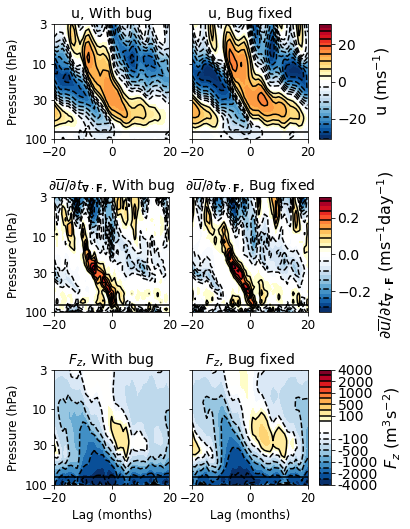

In [6]:
fig = plt.figure(figsize=(16,16))

ax = qbo.plotqbowinds(fig, dz500_buggy.uzm, dz500_buggy.time, dz500_buggy.ilev, 2, -30, 30, 'u, With bug', 0.77,0.87,0.7,0.8,
                      ylabel=True, contourlines=True, contourlinescale=2)
ax.plot([-20,20],[-np.log10(80),-np.log10(80)], color='black')

ax = qbo.plotqbowinds(fig, dz500_bugfixed.uzm, dz500_bugfixed.time, dz500_bugfixed.ilev, 2, -30, 30, 'u, Bug fixed', 0.89,0.99,0.7,0.8,
                      ylabel=False, contourlines=True, contourlinescale=2)
ax.plot([-20,20],[-np.log10(80),-np.log10(80)], color='black')

ax = cbars.plotcolorbar(fig, 2, -30, 30, 'u (ms$^{-1}$)',1,1.01,0.7,0.8,orient='vertical', contourlines=True, contourlinescale=2)


ciepfd=0.025 ; cmaxepfd=0.3

ax = qbo.plotqbowinds(fig, 86400.*dz500_buggy.utendepfd, dz500_buggy.time, dz500_buggy.ilev, ciepfd, -1.*cmaxepfd, cmaxepfd,
                      r'$\partial\overline{u}/\partial t_{\mathbf{\nabla}\cdot\mathbf{F}}$, With bug',0.77,0.87,0.55,0.65,ylabel=True, contourlines=True, contourlinescale=2)
ax.plot([-20,20],[-np.log10(80),-np.log10(80)], color='black')

ax = qbo.plotqbowinds(fig, 86400.*dz500_bugfixed.utendepfd, dz500_bugfixed.time, dz500_bugfixed.ilev, ciepfd, -1.*cmaxepfd, cmaxepfd,
                      r'$\partial\overline{u}/\partial t_{\mathbf{\nabla}\cdot\mathbf{F}}$, Bug fixed',0.89,0.99,0.55,0.65,ylabel=False, contourlines=True, contourlinescale=2)
ax.plot([-20,20],[-np.log10(80),-np.log10(80)], color='black')

ax = cbars.plotcolorbar(fig, ciepfd, -1.*cmaxepfd, cmaxepfd, r'$\partial\overline{u}/\partial t_{\mathbf{\nabla}\cdot\mathbf{F}}$ (ms$^{-1}$day$^{-1}$)', 
                        1,1.01,0.55,0.65,orient='vertical',
                        contourlines=True, contourlinescale=2)


clevs=[-4000,-3000,-2000,-1500,-1000,-750,-500,-250,-100,-50,0,
       50,100,250,500,750,1000,1500,2000,3000,4000]

ax = qbo.plotqbowinds(fig, dz500_buggy.epfz, dz500_buggy.time, dz500_buggy.ilev, 0.1,-1,1,
                      '$F_{z}$, With bug',0.77,0.87,0.4,0.5,ylabel=True,speclevs=clevs,contourlines=True, contourlinescale=2, xlabel='Lag (months)')
ax.plot([-20,20],[-np.log10(80),-np.log10(80)], color='black')

ax = qbo.plotqbowinds(fig, dz500_bugfixed.epfz, dz500_bugfixed.time, dz500_bugfixed.ilev,0.1,-1,1,
                      '$F_{z}$, Bug fixed', 0.89,0.99,0.4,0.5,ylabel=False, speclevs=clevs, contourlines=True, contourlinescale=2, xlabel='Lag (months)')
ax.plot([-20,20],[-np.log10(80),-np.log10(80)], color='black')

ax = cbars.plotcolorbar_sayc(fig, clevs, '$F_{z}$ (m$^{3}$s$^{-2}$)',1,1.01,0.4,0.5,orient='vertical',
                             contourlines=True, contourlinescale=2,
                            ticks=[-4000,-2000,-1000,-500,-100,100,500,1000,2000,4000])

fig.savefig(plotpath+'figS1.pdf', bbox_inches='tight', facecolor='white')